**Part1:** Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.

**Answer:**  The primary objective of this assignment is to find a model that will output the best classification accuracy. Along with the classification accuracy, I will also focus on the interpretability of the model. 
For the best classification results, I will use different classifiers such as Logistic Regression, Support Vector Machine (SVM), and different ensemble-based approaches. For interpretability and to find the useful feature, we can choose the feature variable by backward elimination (remove one variable at a time) or forward elimination (add one variable at a time), and then observe the performance of the model. Moreover, the outcomes of the simple model such as tree-based classifier are more self-explanatory than polynomial models.

**Part2:** Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

**Answer:** I will be using the breast_cancer dataset for this assignment. This is a well-known data set, and I downloaded the data set from the scikit-learn dataset library. The next few lines of codes show how to use this dataset.

- I check the first five rows of the dataset. The dataset has 569 rows.
- The dataset has 30 variables and all of them are numeric. Different feature has different value range.
- The target variable is 'malignant' and 'benign' which are assigned as 1 and 0.

By this data set, we will train and evaluate the classifier to get the best classification output.

In [ ]:
#import scikit-learn dataset library and load dataset
from sklearn import datasets
import pandas as pd
import numpy as np

cancer=datasets.load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#print the number of rows
print(df.shape[0])
#print the list of columns
print(df.columns.to_list())
#Information about the data
df.info()

569
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null   

In [ ]:
#print the target variable
print(cancer.target_names)
print(cancer.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

**Part3:** Brief summary of data exploration and actions taken for data cleaning and feature engineering.

**Answer:** Summary of data exploration are as follows:

- Check the first few examples (rows) from the dataset to get an idea about the data. Also, check the number of examples. There are 569 rows in the data set.
-  Check the number of columns and their name (feature variables) including the target variable name. Also, check the data type of each variable. There are 31 variables including the target variable and all of them have floating-point values except the target variable. The target variable has binary values.
- Check whether the data have any duplicate value, missing value, null value. We did not found any missing value in our dataset.
- Check the mean, 25%, median, 75%, and the range of all features. Here different feature has different range.

All actions taken for data cleaning and feature engineering are as follows:

 - As there is no duplicate and unnecessary data, we do not remove or update any data. 
 - There are also no missing data. So, we do not need to impute the missing data.
 - We scale all the features in [0,1]. Some classifiers such as the k-NN classifier require the scaled data.
 - We used histogram and boxplot to detect outliner data of each feature. Every feature has some outlier data. However, some models are less sensitive to outlier data.
 - All the features have real data. So, we do not need to encode the feature. 
 - We measure the multicollinearity among the features. Some models are sensitive to highly correlated features. We measure the correlation by the correlation heatmap for the first six features of our dataset.
 - We split the data into training and test set.
  

In [ ]:
#check the null value
df.isnull().sum().sort_values()

mean radius                0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
worst texture              0
worst radius               0
fractal dimension error    0
symmetry error             0
concave points error       0
concavity error            0
compactness error          0
smoothness error           0
area error                 0
perimeter error            0
texture error              0
radius error               0
mean fractal dimension     0
mean symmetry              0
mean concave points        0
mean concavity             0
mean compactness           0
mean smoothness            0
mean area                  0
mean perimeter             0
mean texture               0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
#data description
statas_df=df.describe()
statas_df.loc['range']=statas_df.loc['max']-statas_df.loc['min']
out_fields=['mean','25%','50%','75%','range']
statas_df=statas_df.loc[out_fields]
statas_df.rename({'50%':'median'},inplace=True)
print(statas_df)

        mean radius  mean texture  ...  worst symmetry  worst fractal dimension
mean      14.127292     19.289649  ...        0.290076                 0.083946
25%       11.700000     16.170000  ...        0.250400                 0.071460
median    13.370000     18.840000  ...        0.282200                 0.080040
75%       15.780000     21.800000  ...        0.317900                 0.092080
range     21.129000     29.570000  ...        0.507300                 0.152460

[5 rows x 30 columns]


In [ ]:
#scale the features
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))

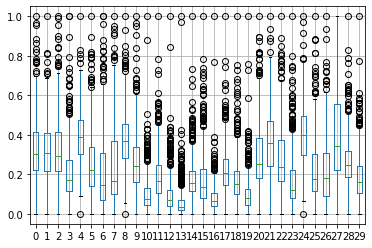

In [ ]:
#check the outlier data
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot()

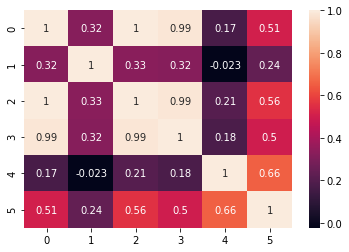

In [ ]:
#check the correlation cofficient
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = df.iloc[:,:6]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
# splitting data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target,test_size=0.2, random_state=109)

**Part4:** Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

**Answer:** In this section, we use the Logistic Regression, SVM, and Random Forest classifier. Details discussion about each classifier and their results are given below:

- Logistic Regression:

>- This classifier is effective for the two-class problem (our problem is a two-class problem) and simple to implement.
>- It does not require any hyperparameter tuning and features scaling is not essential.
>-Logistic Regression gives us around 93.85% test accuracy which is quite acceptable.
>-The dataset has some highly correlated features which affect the model performance.
>-The dataset that we used is linearly separable. So, we get the expected result from logistic regression. But we may not get such good results for non-linear data and if the number of features is too high in the dataset. 


- Support Vector Machine (SVM):

>- SVM is also good for our dataset and it has a moderate number of features (30 features) and a medium size of data (569 rows).
>-SVM is also suitable for binary classification where class data are separable.
>- The dataset has outlier data which has less effect on SVM performance.
>-SVM gives us around 95.61% of test accuracy which is quite acceptable and is higher than Logistic Regression.
>-SVM needs to select the appropriate kernel which may affect its performance.
>-SVM is a bit slow and has poor performance for overlapped data.


- Random Forest:

>- Random forest can handle a huge amount of data and also work well for the imbalanced dataset, though our data set is not imbalanced.
>- Random forest can also handle missing (though we do not have any missing data) and outlier data.
>- It does not have any overfitting issues too.
>- Random forest gives us around 99.12% of test accuracy which is quite acceptable and higher than the Logistic Regression and SVM classifier.
>- It appears to be a black box and has an interpretability issue.  

In [ ]:
#performance of Logistic Regression classifer
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
warnings.filterwarnings("ignore")
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Precision=metrics.precision_score(y_test, y_pred)
Recall=metrics.recall_score(y_test, y_pred)
F1Score = 2*(Recall * Precision) / (Recall + Precision)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', Precision)
print('Recall:', Recall)
print('F1 Score:', F1Score)

Accuracy: 0.9385964912280702
Precision: 0.958904109589041
Recall: 0.9459459459459459
F1 Score: 0.9523809523809523


In [ ]:
#perfirmance of SVM classifer
from sklearn import svm
from sklearn import metrics
clf=svm.SVC(kernel='linear') #Linear kernel
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Precision=metrics.precision_score(y_test, y_pred)
Recall=metrics.recall_score(y_test, y_pred)
F1Score = 2*(Recall * Precision) / (Recall + Precision)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', Precision)
print('Recall:', Recall)
print('F1 Score:', F1Score)

Accuracy: 0.956140350877193
Precision: 0.9859154929577465
Recall: 0.9459459459459459
F1 Score: 0.9655172413793103


In [ ]:
#performance of Random Forest classifer
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Precision=metrics.precision_score(y_test, y_pred)
Recall=metrics.recall_score(y_test, y_pred)
F1Score = 2*(Recall * Precision) / (Recall + Precision)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', Precision)
print('Recall:', Recall)
print('F1 Score:', F1Score)

Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 Score: 0.9864864864864865


**Part5:** A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

**Answer:** Here are my recommendations:

- If the dataset is small and we do not know the relation among the independent and dependent variables, we can use the k-NN classifier.
- If features are highly independent in the dataset, we can use the Naive Bayes classifier.
- If there is a linear relationship between independent and dependent variables we can use logistic regression.
- k-NN, Naive Bayes, and logistic regression classifier are more interpretable and their results are more explainable.
- If there are too many features and the dataset is medium size, we can use SVM.
- For more accuracy, we can use a more complex model such as a random forest.
- We can also evaluate all possible models based on the data set and then check their accuracy in training and test data before selecting them.
- We can also use ensemble learning and can combine the output of more than one model.

**Part6:** Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

**Answer:** All the key findings and insights are as follows:

- All the features in this data set is numeric though the different feature has a different range. We bring data feature values in the same range. 
- The dataset only has two classes. So, our problem is a binary-class problem.
- We calculate the co-relation among different features. Few of the features are highly correlated though most of them are not.
-  We have the outlier data. So for classification, we should focus on the model that can handle outlier data.
- A model such as Linear regression and tree-based classifier may overfit by training data. In this case, we can use the model that does not have any overfitting issues.
- From the performance point of view complex model is better. For interpretability, it is better to use the less complex model.

**Part7:** Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

**Answer:** Here is the list of suggestions for the next steps in analyzing the data.

- Reduce the dimension of the data if there are too many features. This will also help to remove the unimportant feature.
- If there are a limited number of features, we can create new features by combining the existing features.
- We can over-sample the data if there are not sufficient data to train a model. 
- Some models need to satisfy some pre-condition. We need to be focused on this issue too. Here are some examples:

>- In k-NN, scaling the data absolute must.
>- In Naive Bayes, features need to be independent.
>- In logistic regression, the data need to be linearly separable.
>- SVM is slow for the larger dataset.
>- The decision tree has an overfitting issue.
>- Random forest appears as black-box.